In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
from tensorflow.keras.layers import Embedding

# Teacher model

In [3]:
words_per_sentence = 200
embedding_dim = 100
total_words = 20

embedding_matrix = np.zeros((total_words+2, embedding_dim))

embedding_layer = tf.keras.layers.Embedding(
    total_words+2,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [4]:

inputs = keras.Input(shape=(words_per_sentence,), dtype='int64')

x = embedding_layer(inputs)

x = keras.layers.Conv1D(128, 5, activation='relu')(x)
x = keras.layers.GlobalMaxPooling1D()(x)
x = keras.layers.Dropout(0.5)(x)
x = keras.layers.Dense(8, activation='softmax')(x)

outputs = x

net1 = keras.Model(inputs, outputs)

In [6]:
net1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 100)          2200      
                                                                 
 conv1d (Conv1D)             (None, 196, 128)          64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 8)                 1032      
                                                             

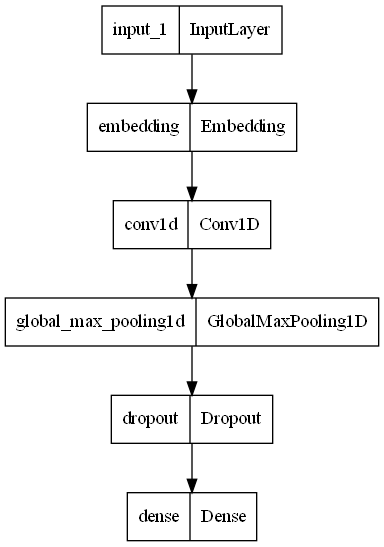

In [5]:
keras.utils.plot_model(net1)

# 1D CNN Model

https://towardsdatascience.com/deep-learning-techniques-for-text-classification-78d9dc40bf7c

In [ ]:
inputs = keras.Input(shape=(words_per_sentence,), dtype='int64')
x = embedding_layer(inputs)

x = keras.layers.Conv1D(100, 3, activation='relu')(x)
x = keras.layers.GlobalMaxPooling1D()(x)

x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Dense(8, activation='softmax')(x)

#model.compile(loss='binary_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])

In [ ]:
inputs = keras.Input(shape=(words_per_sentence,), dtype='int64')
x = embedding_layer(inputs)

x = keras.layers.Conv1D(100, 3, activation='relu')(x)
x = keras.layers.GlobalMaxPooling1D()(x)

x = keras.layers.Conv1D(100, 4, activation='relu')(x)
x = keras.layers.GlobalMaxPooling1D()(x)

x = keras.layers.Conv1D(100, 5, activation='relu')(x)
x = keras.layers.GlobalMaxPooling1D()(x)

x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Dense(8, activation='softmax')(x)

https://machinelearningmastery.com/best-practices-document-classification-deep-learning/

# Other


https://realpython.com/python-keras-text-classification/

In [ ]:
net3 = keras.layers.Sequential()


net3.add(keras.layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
net3.add(keras.layers.Conv1D(128, 5, activation='relu'))
net3.add(keras.layers.GlobalMaxPooling1D())
net3.add(keras.layers.Dense(8, activation='softmax'))


net3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## example grid search


In [ ]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[5000], 
                  embedding_dim=[50],
                  maxlen=[100])

# Model 4
https://www.atmosera.com/blog/text-classification-with-neural-networks/

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32, input_length=100))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# LSTM 
https://www.analyticsvidhya.com/blog/2021/06/lstm-for-text-classification/

In [ ]:
model=Sequential()

model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))

model.add(LSTM(128,input_shape=(embedded_docs.shape),activation='relu',return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(128,activation='relu'))

model.add(Dropout(0.2))

# for units in [128,128,64,32]:

# model.add(Dense(units,activation='relu'))

# model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(8,activation='softmax'))


# Kaggle
https://www.kaggle.com/code/sanikamal/text-classification-with-python-and-keras

In [ ]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

PAGAMENTO FDP
https://medium.datadriveninvestor.com/deep-learning-techniques-for-text-classification-9392ca9492c7